<a href="https://colab.research.google.com/github/blessjal/practicums/blob/master/pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix

In [17]:
df = pd.read_csv('/content/sample_data/College.txt')

df.head()

Unnamed: 0 Private  Apps  ...  perc.alumni  Expend  Grad.Rate
0  Abilene Christian University     Yes  1660  ...           12    7041         60
1            Adelphi University     Yes  2186  ...           16   10527         56
2                Adrian College     Yes  1428  ...           30    8735         54
3           Agnes Scott College     Yes   417  ...           37   19016         59
4     Alaska Pacific University     Yes   193  ...            2   10922         15

[5 rows x 19 columns]

In [18]:
df.set_index('Unnamed: 0', inplace=True)

In [19]:
df['Private'] = np.where(df.Private == 'Yes', 1, 0)
df['Private'].value_counts()

1    565
0    212
Name: Private, dtype: int64

In [20]:
df.head()

Private  Apps  ...  Expend  Grad.Rate
Unnamed: 0                                   ...                   
Abilene Christian University        1  1660  ...    7041         60
Adelphi University                  1  2186  ...   10527         56
Adrian College                      1  1428  ...    8735         54
Agnes Scott College                 1   417  ...   19016         59
Alaska Pacific University           1   193  ...   10922         15

[5 rows x 18 columns]

In [22]:
df.corr()

Private      Apps    Accept  ...  perc.alumni    Expend  Grad.Rate
Private      1.000000 -0.432095 -0.475252  ...     0.414775  0.258461   0.336162
Apps        -0.432095  1.000000  0.943451  ...    -0.090226  0.259592   0.146755
Accept      -0.475252  0.943451  1.000000  ...    -0.159990  0.124717   0.067313
Enroll      -0.567908  0.846822  0.911637  ...    -0.180794  0.064169  -0.022341
Top10perc    0.164132  0.338834  0.192447  ...     0.455485  0.660913   0.494989
Top25perc    0.095752  0.351640  0.247476  ...     0.417864  0.527447   0.477281
F.Undergrad -0.615561  0.814491  0.874223  ...    -0.229462  0.018652  -0.078773
P.Undergrad -0.452088  0.398264  0.441271  ...    -0.280792 -0.083568  -0.257001
Outstate     0.552650  0.050159 -0.025755  ...     0.566262  0.672779   0.571290
Room.Board   0.340532  0.164939  0.090899  ...     0.272363  0.501739   0.424942
Books       -0.018549  0.132559  0.113525  ...    -0.040208  0.112409   0.001061
Personal    -0.304485  0.178731  0.200989  ...    -0.285968 -0.097892  -0.269344
PhD         -0.156714  0.390697  0.355758  ...     0.249009  0.432762   0.305038
Terminal    -0.129620  0.369491  0.337583  ...     0.267130  0.438799   0.289527
S.F.Ratio   -0.472205  0.095633  0.176229  ...    -0.402929 -0.583832  -0.306710
perc.alumni  0.414775 -0.090226 -0.159990  ...     1.000000  0.417712   0.490898
Expend       0.258461  0.259592  0.124717  ...     0.417712  1.000000   0.390343
Grad.Rate    0.336162  0.146755  0.067313  ...     0.490898  0.390343   1.000000

[18 rows x 18 columns]

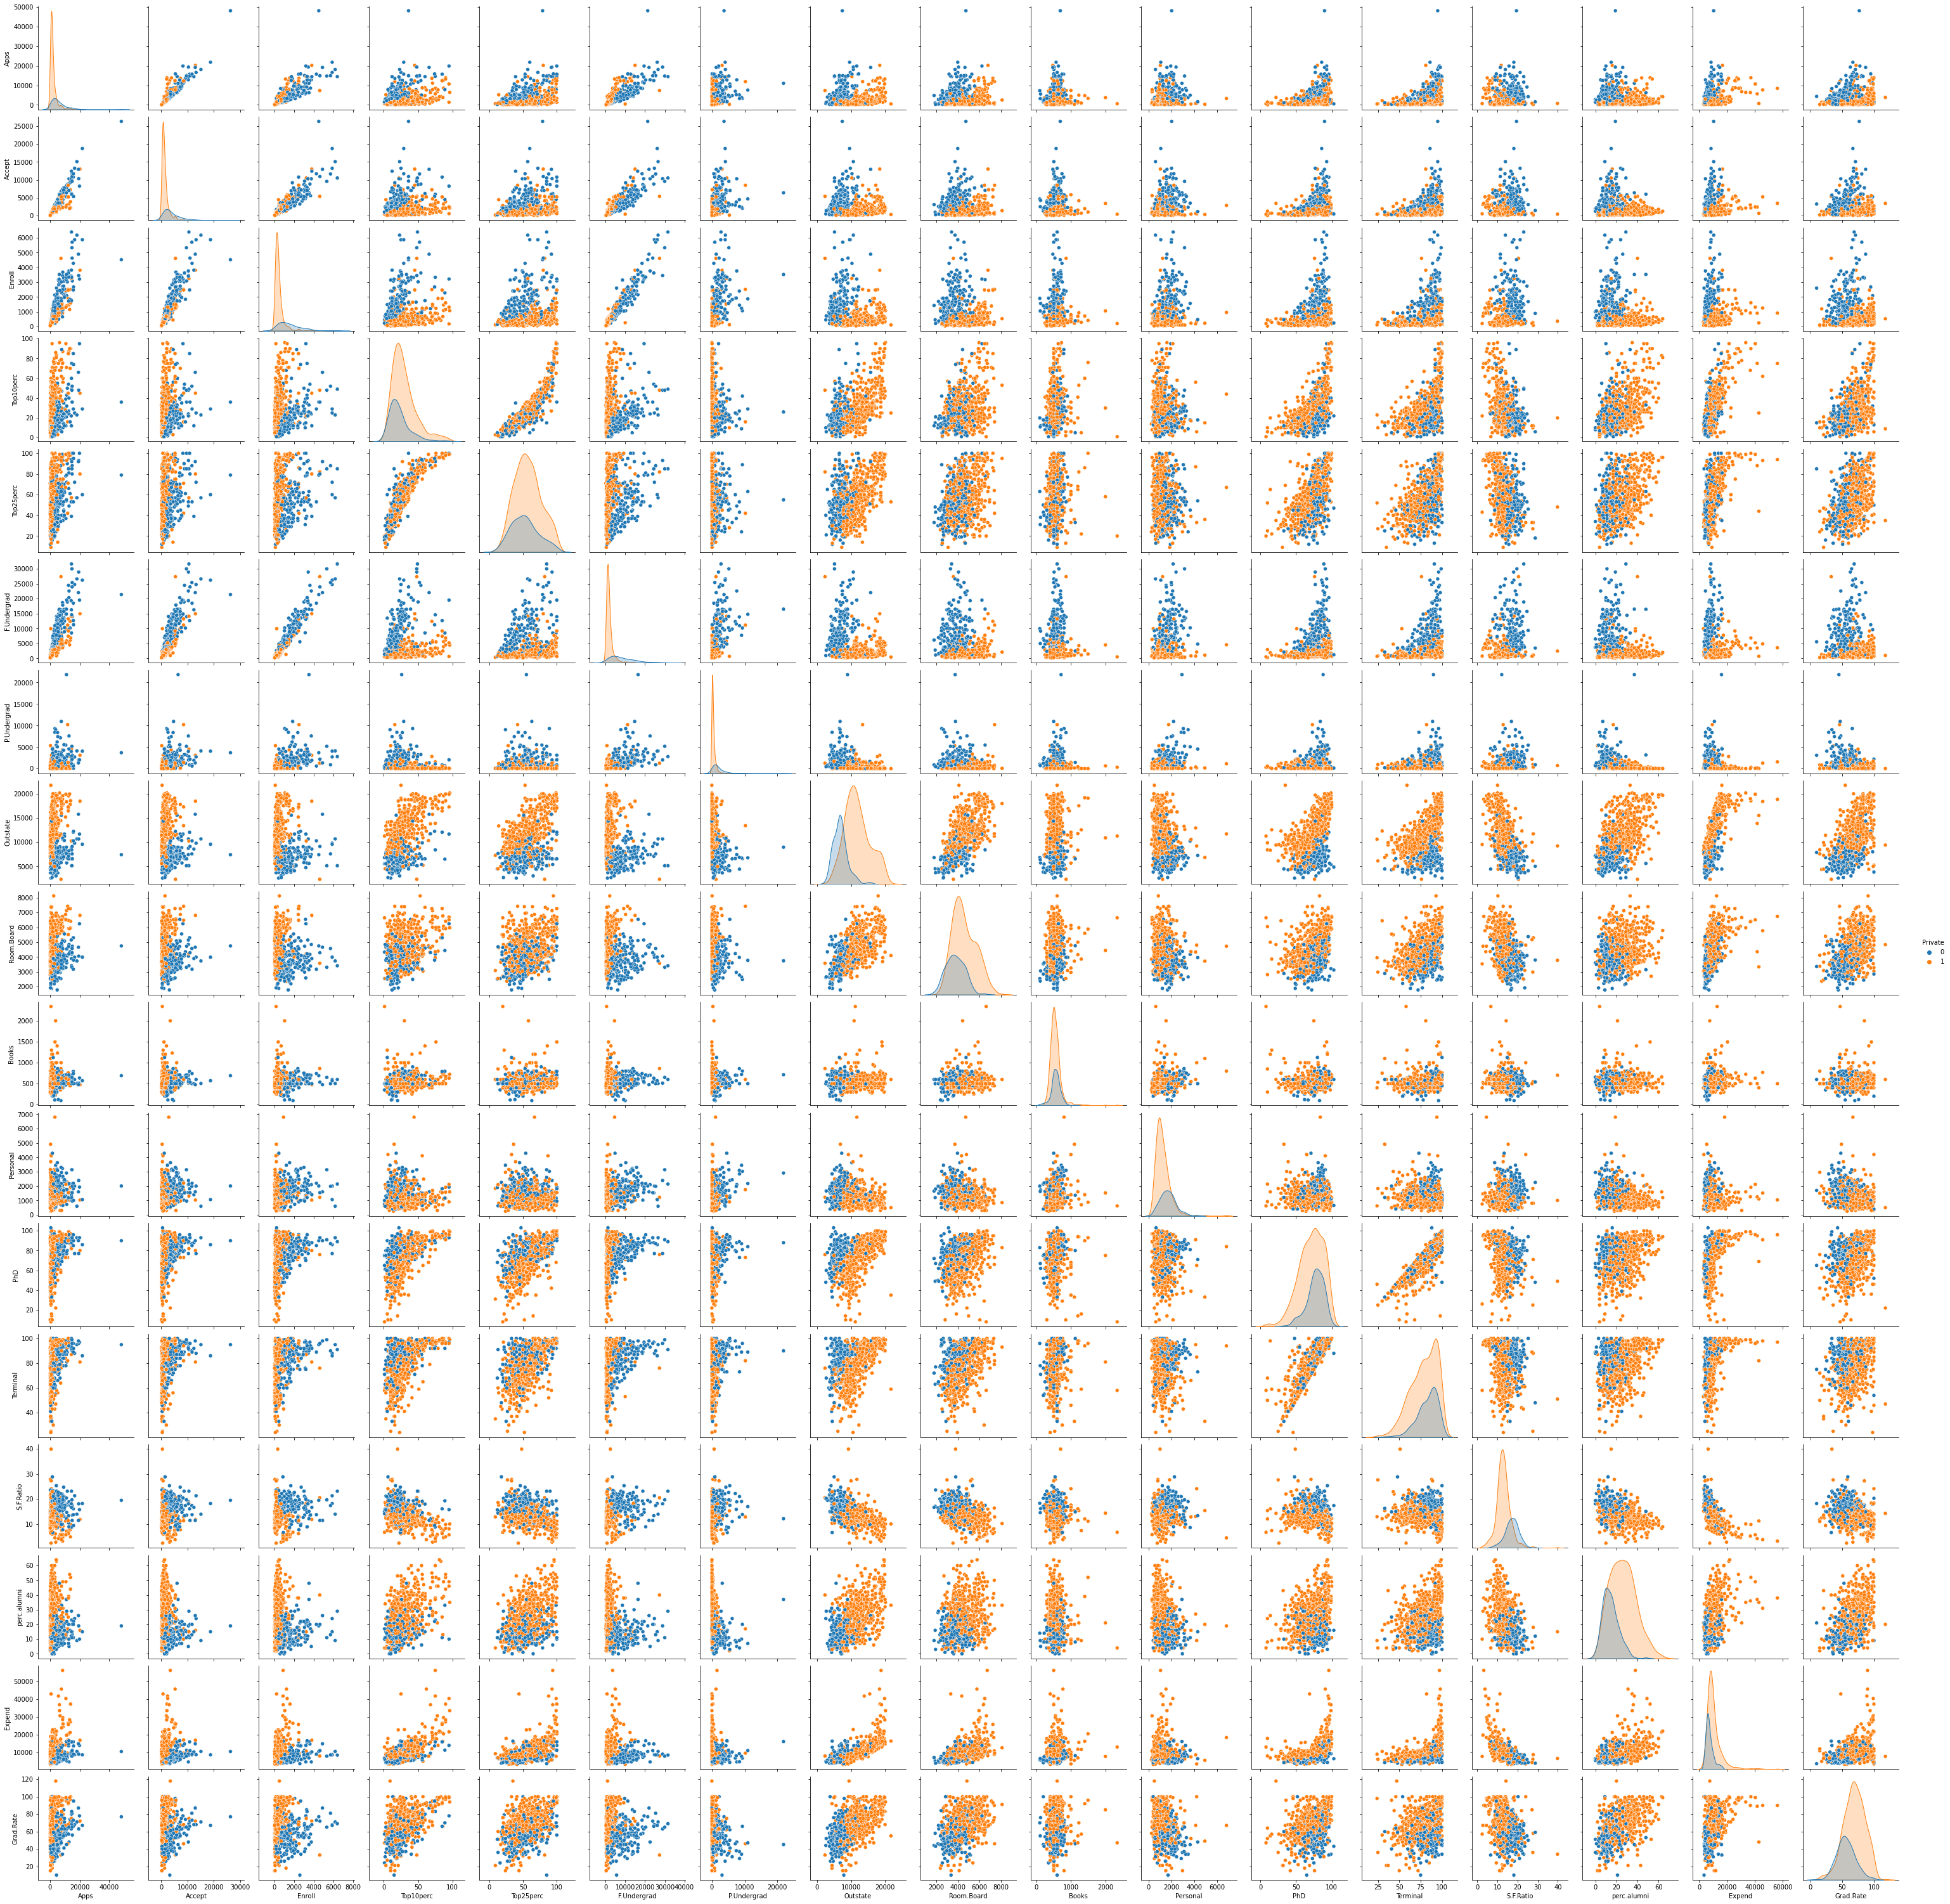

In [21]:
sns.pairplot(df, hue='Private')

In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
df_r = sc.fit_transform(df)
pca = PCA(n_components=3)
pca.fit(df_r)

print(pca.components_)
print()
print('-'*100)
print(pca.explained_variance_)
print()
print('-'*100)
print(pca.mean_)
print()
print('-'*100)
print("The PVE of the third component is " + str(pca.explained_variance_[2]))

# alpha and beta points on the first principal component (so we can draw a line)
alpha=pca.components_[0]*pca.explained_variance_[0]+pca.mean_
beta=pca.components_[0]*(-1)*pca.explained_variance_[0]+pca.mean_
print()
print('-'*100)
print('The alpha point of the first principal component:', alpha)
print()
print('-'*100)
print('The beta point of the first principal component:', beta)
# alpha1 and beta1 are the corresponding values for the second principal component
alpha1=pca.components_[1]*pca.explained_variance_[1]+pca.mean_
beta1=pca.components_[1]*(-1)*pca.explained_variance_[1]+pca.mean_
print()
print('-'*100)
print('The alpha point of the second principal component:', alpha1)
print()
print('-'*100)
print('The beta point of the second principal component:', beta1)

[[ 0.08900986  0.19963015  0.15379708  0.11779674  0.3603494   0.34475068
   0.0940877  -0.01748305  0.32766424  0.26653375  0.05718904 -0.07190001
   0.30325419  0.30386831 -0.21026024  0.23665864  0.33301113  0.27308629]
 [-0.34587868  0.34362077  0.37255666  0.39969663 -0.01623782  0.01772991
   0.41073157  0.29306437 -0.19151794 -0.09397936  0.05733828  0.19275549
   0.1161911   0.10419228  0.20439519 -0.19406064 -0.07029054 -0.11783036]
 [ 0.15138809  0.00474449 -0.02538893 -0.0275184   0.00468765 -0.05896012
  -0.01673964  0.14935499  0.06638818  0.18211903  0.66231127  0.46955695
  -0.20848214 -0.14673334 -0.29224659 -0.15945779  0.21733335 -0.17260672]]

----------------------------------------------------------------------------------------------------
[5.4669693  5.06260221 1.19111697]

----------------------------------------------------------------------------------------------------
[-1.09736330e-16  3.65787766e-17  5.48681649e-17 -5.48681649e-17
 -4.11511237e-17 -1.554598